<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
خواندن کتابخانه ها
</h3>
</div>

In [13]:
import pandas as pd
import matplotlib.pyplot as pyplt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from  sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




---


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
دریافت مجموعه داده
</h3>
</div>

In [4]:
file_1 = "Adult_TrainDataset.csv"
file_2 = "Adult_TestDataset.csv"
df_train = pd.read_csv(file_1)
df_test = pd.read_csv(file_2)
df_train
#df_test


,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<div dir="rtl">
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
در این قسمت دو دیتاست داده شده خوانده و دیتاست مربوط به آموزش مدل نمایش داده شده است.
</p>


---


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
تحلیل و بررسی داده
</h3>
</div>

<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مجموعه داده را با روش های مختلف از جمله رسم پلات های مختلف بررسی کنید تا یک شهود کلی نسبت به آن داشته باشید. 
</p>

</div>

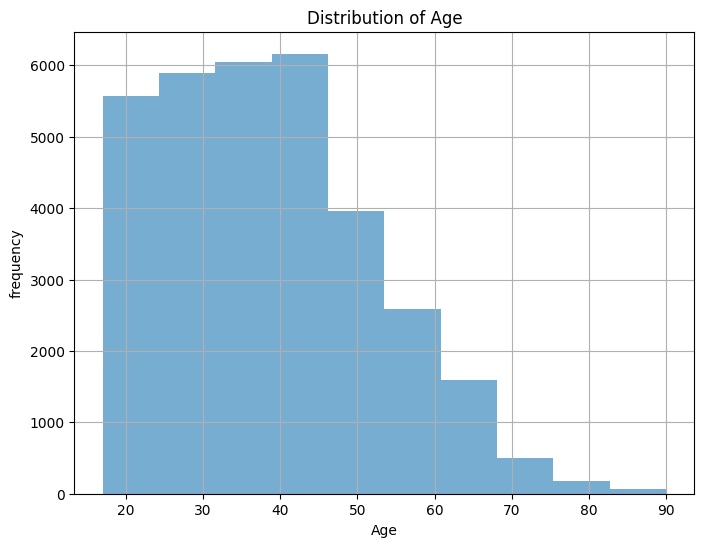

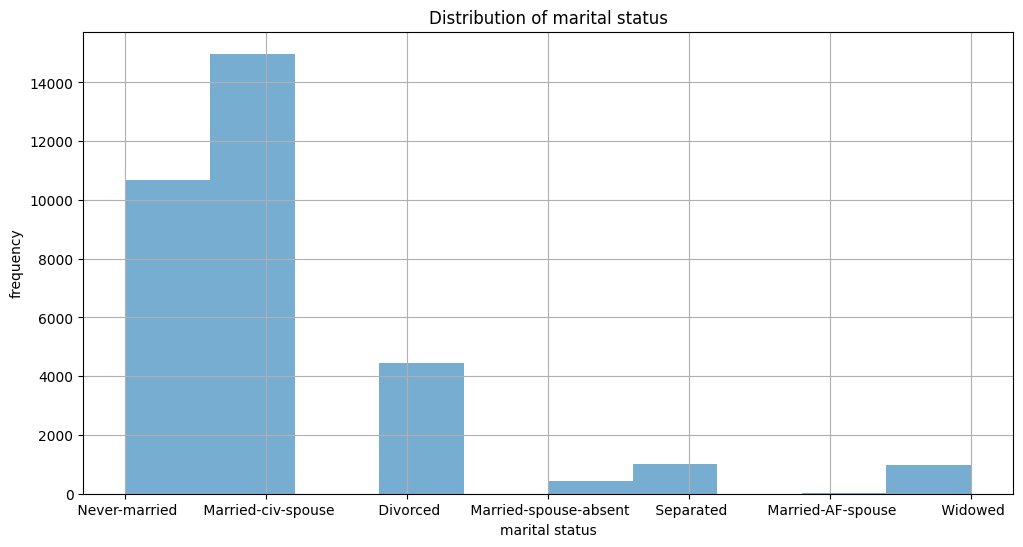

<Figure size 800x600 with 0 Axes>

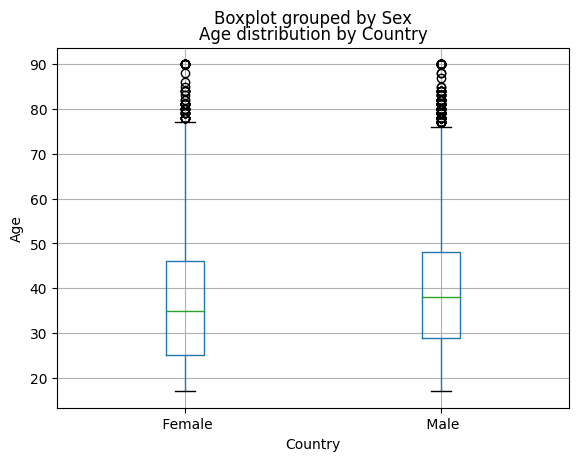

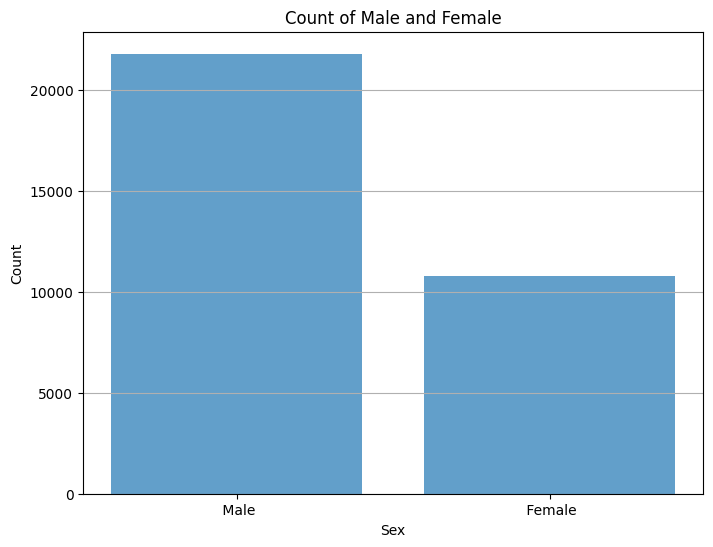

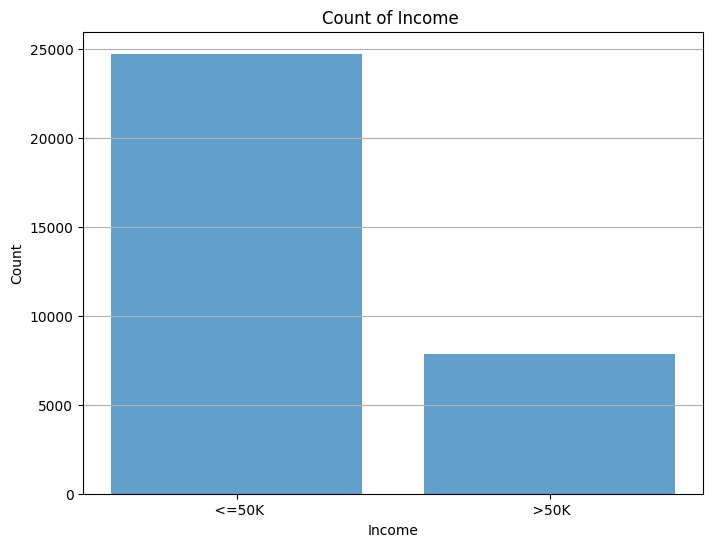

In [5]:
# Understanding Dataset

#Histogram
plt.figure(figsize=(8, 6))
plt.hist(df_train["Age"], bins=10, alpha=0.6)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(df_train["Marital_Status"], bins=10, alpha=0.6)
plt.title("Distribution of marital status")
plt.xlabel("marital status")
plt.ylabel("frequency")
plt.grid(True)
plt.show()


#Boxplot
plt.figure(figsize=(8, 6))
df_train.boxplot(column="Age", by="Sex")
plt.title("Age distribution by Country")
plt.xlabel("Country")
plt.ylabel("Age")
plt.grid(True)
plt.show()

#Barplot
sex_counts = df_train['Sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sex_counts.index, sex_counts.values, alpha=0.7)
plt.title('Count of Male and Female')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

income_counts = df_train["Income"].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(income_counts.index, income_counts.values, alpha=0.7)
plt.title('Count of Income ')
plt.xlabel('Income')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()



<div dir="rtl">
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
برای تحلیل داده در این بخش چندین نمودار مختلف از جمله تعداد افراد با درآمد بیشتر و کمتر از 50 هزار، تعداد افراد زن و مرد، توزیع سن افراد موجود در دیتا ست و وضعیت ازدواج افراد نمایش داده شده است. در این بخش از سه نوع نمایشhistogram، Boxplot و Barplot استفاده شده است.
</p>


---


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
پیش پردازش داده
</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این بخش با روش های مختلف داده هارا پردازش کرده و تغییرات لازم را روی داده لحاظ کرده تا دقت نهایی افزایش یابد.
</p>
</div>

In [6]:
# Data Preprocessing

#Handling missing values
numerical_columns = ["Age", "Final_Weight", "Education-Number", 
                     "Capital_Gain", "Capital_Loss", "Hours-Per-Week"]

categorical_columns = ["Work_Class", "Education", "Marital_Status", "Occupation",
                       "Relationship", "Race", "Sex", "Native_Country", "Income"]

for col in numerical_columns:
    df_train[col].fillna(df_train[col].mean(), inplace=True)
    df_test[col].fillna(df_test[col].mean(), inplace=True)

for col in categorical_columns:
    most_frequent_category_train = df_train[col].mode()[0]
    df_train[col].fillna(most_frequent_category_train, inplace=True)

    most_frequent_category_test = df_test[col].mode()[0]
    df_test[col].fillna(most_frequent_category_test, inplace=True)


#Encoding categorical values (Label Encoding)
label_encode = LabelEncoder()
for col in categorical_columns:
    df_train[col] = label_encode.fit_transform(df_train[col])
    df_test[col] = label_encode.fit_transform(df_test[col])

#Scaling numerical features(standard scaler)
scaler = StandardScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_test[numerical_columns] = scaler.fit_transform(df_test[numerical_columns])


df_test



,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,-0.994129,4,0.353474,1,-1.196864,4,7,3,2,1,-0.142662,-0.218062,-0.031432,38,0
1,-0.055417,4,-0.942391,11,-0.417886,2,5,0,4,1,-0.142662,-0.218062,0.769918,38,0
2,-0.777503,2,1.395450,7,0.750582,2,11,0,4,1,-0.142662,-0.218062,-0.031432,38,1
3,0.377835,4,-0.275397,15,-0.028397,2,7,0,2,1,0.871091,-0.218062,-0.031432,38,1
4,-1.499590,0,-0.812954,15,-0.028397,4,0,3,4,0,-0.142662,-0.218062,-0.832781,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.016791,4,0.245794,9,1.140071,0,10,1,4,0,-0.142662,-0.218062,-0.351972,38,0
16277,1.822007,0,1.248371,11,-0.417886,6,0,2,2,1,-0.142662,-0.218062,-0.031432,38,0
16278,-0.055417,4,1.755221,9,1.140071,2,10,0,4,1,-0.142662,-0.218062,0.769918,38,0
16279,0.377835,4,-0.998420,9,1.140071,0,1,3,1,1,0.576644,-0.218062,-0.031432,38,0


<div dir="rtl">
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
در این قسمت برای  پیش پردازش داده ها، ابتدا missing value را سازماندهی کردیم. برای داده های عددی مقادیر از دست رفته را برابر میانگین باقی داده ها گذاشتیم و همچنین برای داده های غیر عددی، مقداری که بیشترین تکرار را در بین بقیه داده ها داشت برگزیدیم. در مرحله بعد برای نگاشت مقادیر غیر عددی به عددی از روش Label Encoding استفاده شده است. دلیل استفاده از این روش این است که در صورت استفاده از روش one-hot-encoding، دیتا ست خروجی ما به دلیل تعداد زیاد مقادیر خیلی بزرگ می شود و برای جلوگیری از بروز این اتفاق از Label encoding استفاده کرده ایم. در نهایت در مرحله آخر با استفاده از روش standard scaling، داده های عددی را scale  کردیم.
</p>


---


<div dir="rtl">
<h2 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
آموزش مدل با روش های مختلف
</h2>
</div>
<div dir="rtl">
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
دﺭ ﺁﻣﻮﺯﺵ ﻫﺮ ﻣﺪﻝ ، ﺩﺭ ﺻﻮﺭﺕ ﺗﻨﻈﻴﻢ ﻫﺎﻳﭙﺮﭘﺎﺭﺍﻣﺘﺮﻫﺎﻱ ﻣﺪﻝ ﺩﺭ ﻛﺘﺎﺑﺨﺎﻧﻪ sklearn، ﺩﻻﻳﻞ ﺍﻳﻦ ﺍﻧﺘﺨﺎﺏ ﻫﺎ ﻭ ﺗﺤﻠﻴﻞ
ﺧﻮﺩﺗﺎﻥ ﺭﺍ ﺍﺯ ﻧﺘﺎﻳﺢ ﺣﺎﺻﻞ ﺷﺪﻩ، ﮔﺰﺍﺭﺵ ﺩﻫﻴﺪ.</p>
</div>


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
Support Vector Machine
</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مدل خود را با استفاده از Support Vector Machine آموزش دهید.
</p>
</div>

In [7]:
#SVM
features_train = df_train.drop("Income", axis=1)
labels_train = df_train["Income"]
features_test = df_test.drop("Income", axis=1)
labels_test = df_test["Income"]

svm_model = SVC(kernel="linear", C=1.0, random_state=42)
svm_model.fit(features_train, labels_train)

labels_pred = svm_model.predict(features_test)

svm_accuracy = accuracy_score(labels_test, labels_pred)
print(f"Accuracy: {svm_accuracy}")

svm_record = classification_report(labels_test, labels_pred)
svm_confusion_matrix = confusion_matrix(labels_test, labels_pred)



Accuracy: 0.8126036484245439


<div dir="rtl">
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
در این قسمت برای آموزش از روش SVM استفاده کردیم. در این تمرین فرض بر آن شده است که مدل خیلی پیچیده نیست و می توان از SVM خطی استفاده کرد. برای همین مقدار kernel را برابر linear قرار دادیم. همچنین مقدار C که بیانگر  regularization parameter است برابر یک  یعنی مقدار دیفالت قرار داده شده است. مقدار  random_state نیز همان مقدار معمول (42) در نظر گرفته شده است. خاطر نشان شود که در ابتدای قطعه کد فیچر ها و لیبل آموزش و تست مشخص شده است و سپس به ترتیب مشخص کردن مدل، فیت کردن، پیشبینی و محاسبه دقت انجام شده است.
</p>

<div style="border-top: 1px dashed #999;"></div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
K-Nearest Neighbors</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مدل خود را با استفاده از KNeighborsClassifier آموزش دهید.
</p>
</div>

In [8]:
#KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(features_train, labels_train)

labels_pred = knn_model.predict(features_test)

knn_accuracy = accuracy_score(labels_test, labels_pred)
print(f"Accuracy: {knn_accuracy}")


knn_record = classification_report(labels_test, labels_pred)
knn_confusion_matrix = confusion_matrix(labels_test, labels_pred)


Accuracy: 0.8263005957864996


<div dir="rtl">
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
در این بخش از مدل KNNبرای آموزش مدل استفاده کردیم. پیکره ی کلی قطعه کد این بخش نیز مانند بخش قبل است با این تفاوت که در این بخش از روش KNN استفاده شده است. مقدار n در این بخش برابر 5 در نظر گرفته شده است. به طور کلی بهتر است n یک عدد فرد باشد تا در صورت برابر بودن شرایط در نهایت به یک خروجی نهایی دست پیدا کنیم که این جا n=5 شده است.
</p>

<div style="border-top: 1px dashed #999;"></div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
Naive Bayes
</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مدل خود را با استفاده از Naive Bayes آموزش دهید.
</p>
</div>

In [9]:
#Naive Bayes
nb_model = GaussianNB()
nb_model.fit(features_train, labels_train)

labels_pred = nb_model.predict(features_test)

NB_accuracy = accuracy_score(labels_test, labels_pred)
print(f"Accuracy: {NB_accuracy}")

NB_record = classification_report(labels_test, labels_pred)
NB_confusion_matrix = confusion_matrix(labels_test, labels_pred)


Accuracy: 0.8041275105951723


<div dir="rtl">
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
این بخش نیز مانند دو قسمت قبل است با این تفاوت که روش استفاده شده Naive Bayes  می باشد. پارامتر خاصی هم مورد استفاده قرار نگرفته است.
</p>

<div style="border-top: 1px dashed #999;"></div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
Random Forest
</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مدل خود را با استفاده از RandomForestClassifier آموزش دهید.
</p>
</div>

In [10]:
#Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(features_train, labels_train)

labels_pred = rf_model.predict(features_test)

rf_accuracy = accuracy_score(labels_test, labels_pred)
print(f"Accuracy: {rf_accuracy}")

rf_record = classification_report(labels_test, labels_pred)
rf_confusion_matrix = confusion_matrix(labels_test, labels_pred)


Accuracy: 0.8509305325225723


<div dir="rtl">
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
در بخش آخر از روش جنگل تصادفی استفاده شده است. پارامتر n_estimator در تابع این روش نشان دهنده تعداد درخت های استفاده شده برای آموزش مدل است که در اینجا این مقدار، 100 در نظر گرفته شده است. ادامه قطعه کد مانند بخش های قبل است.
</p>


---


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
مقایسه مدل ها</h3>
</div>

<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">

ﺩﺭ ﻧﻬﺎﻳﺖ ﺑﻌﺪ ﺍﺯ ﺁﻣﻮﺯﺵ ﻣﺪﻝ ﻫﺎ، ﺑﺮﺍﻱ ﺍﺭﺯﻳﺎﺑﻲ ﻋﻤﻠﻜﺮﺩ ﻣﺪﻝ ﻫﺎ، ﺍﺯ ﻣﺠﻤﻮﻋﻪ ﺩﺍﺩﻩ
<code> Adult_TestDataset </code>
ﺍﺳﺘﻔﺎﺩﻩ ﻧﻤﺎﻳﻴﺪ ﻭ ﺑﺎ ﺍﺳﺘﻔﺎﺩﻩ ﺍﺯ ﻣﺎﺗﺮﻳﺲ ﺩﺭﻫﻢ ﺭﻳﺨﺘﮕﻲ
<code> (confusion matrix) </code>
ﻭ ﻣﻌﻴﺎﺭﻫﺎﻱ ﺍﺭﺯﻳﺎﺑﻲ
<code> recall  </code>,
<code> precision  </code>,
<code> accuracy  </code>,
<code> f1-score    </code>
 ، ﺑﻪ ﺗﺤﻠﻴﻞ ﻧﺘﺎﻳﺞ ﺑﺪﺳﺖ ﺁﻣﺪﻩ ﺑﭙﺮﺩﺍﺯﻳﺪ. ﺗﻮﺟﻪ ﺩﺍﺷﺘﻪ ﺑﺎﺷﻴﺪ ﻛﻪ ﺑﺮﺍﻱ ﺳﺎﺩﮔﻲ ﻛﺎﺭ، ﻣﻲ ﺗﻮﺍﻧﻴﺪ ﺑﺎ ﺍﺳﺘﻔﺎﺩﻩ ﺍﺯ ﺗﻮﺍﺑﻊ ﺁﻣﺎﺩﻩsklearn  ، ﻣﺎﺗﺮﻳﺲ ﺩﺭﻫﻢ ﺭﻳﺨﺘﮕﻲ ﻭ ﻣﻌﻴﺎﺭﻫﺎﻱ ﺍﺭﺯﻳﺎﺑﻲ ﺭﺍ ﺑﺪﺳﺖ ﺁﻭﺭﻳﺪ.

</p>
</div>

In [11]:
print("\nSVM Report:")
print(svm_record)
print("\nSVM Confusion Matrix:")
print(svm_confusion_matrix)
print("\n")


print("\nKNN Report:")
print(knn_record)
print("\nKNN Confusion Matrix:")
print(knn_confusion_matrix)
print("\n")


print("\nNaive Bayes Report:")
print(NB_record)
print("\nNaive Bayes Confusion Matrix:")
print(NB_confusion_matrix)
print("\n")

print("\nRandom Forest Report:")
print(rf_record)
print("\nRandom Forest Confusion Matrix:")
print(rf_confusion_matrix)
print("\n")


SVM Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     12435
           1       0.76      0.30      0.43      3846

    accuracy                           0.81     16281
   macro avg       0.79      0.64      0.66     16281
weighted avg       0.80      0.81      0.78     16281


SVM Confusion Matrix:
[[12080   355]
 [ 2696  1150]]



KNN Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     12435
           1       0.65      0.57      0.61      3846

    accuracy                           0.83     16281
   macro avg       0.76      0.74      0.75     16281
weighted avg       0.82      0.83      0.82     16281


KNN Confusion Matrix:
[[11262  1173]
 [ 1655  2191]]



Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     12435
           1       0.67      0.33      0.44      3846

    accuracy           

<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    تحیل شما
</p>

<div dir="rtl">
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
همانطور که مشخص است در خروجی این قسمت گزارش مربوط به هر یک از مدل های آموزش داده شده که شامل معیار های accuracy، precision، f1-score  است نشان داده شده است. با توجه به خروجی این قسمت به نظر روش جنگل تصادفی دقت بالاتری از بقیه روش ها داشته و بهتر آموزش دیده است. پس از آن به ترتیب Naive_Bayes,Svm,KNN گزینه های مناسبی برای آموزش مدل بوده اند.
</p>


---


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:green">
بخش امتیازی
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
هر روش دیگری برای آموزش مدل را میتوانید در این بخش پیاده سازی نمایید ، اما لازمه آن فهم کامل آن روش هست پس در صورتی که روش دیگری را نیز پیاده سازی کردید فهم خود را از نتایج بدست آمده و خود روش بنویسید.
</p>

</div>



In [17]:
#Gradient Boosting Classifier
GB_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
GB_model.fit(features_train, labels_train)

labels_pred = GB_model.predict(features_test)

Gb_accuracy = accuracy_score(labels_test, labels_pred)
print(f"Accuracy: {Gb_accuracy}")

GB_record = classification_report(labels_test, labels_pred)
GB_confusion_matrix = confusion_matrix(labels_test, labels_pred)

print("\nGradient Boosting Report:")
print(GB_record)
print("\nGradient Boosting Confusion Matrix:")
print(GB_confusion_matrix)
print("\n")


Accuracy: 0.8631533689576807

Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     12435
           1       0.79      0.58      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.83      0.76      0.79     16281
weighted avg       0.86      0.86      0.86     16281


Gradient Boosting Confusion Matrix:
[[11838   597]
 [ 1631  2215]]




In [18]:

#Logistic Regression
LR_model = LogisticRegression()
LR_model.fit(features_train, labels_train)

labels_pred = LR_model.predict(features_test)

LR_accuracy = accuracy_score(labels_test, labels_pred)
print(f"Accuracy: {LR_accuracy}")

LR_record = classification_report(labels_test, labels_pred)
LR_confusion_matrix = confusion_matrix(labels_test, labels_pred)

print("\nLogistic Regression Report:")
print(LR_record)
print("\nLogistic Regression Confusion Matrix:")
print(LR_confusion_matrix)
print("\n")

Accuracy: 0.824212271973466

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     12435
           1       0.70      0.44      0.54      3846

    accuracy                           0.82     16281
   macro avg       0.77      0.69      0.72     16281
weighted avg       0.81      0.82      0.81     16281


Logistic Regression Confusion Matrix:
[[11719   716]
 [ 2146  1700]]




c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    تحیل شما از مدل امتیازی
</p>

<div dir="rtl">
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
برای آموزش مدل در این بخش از دو روش Gradient Bossting و Logistic Regression استفاده می کنیم. روش Gradient Boosting جزو روش های ensemble محسوب می شود که بر پایه ی روش boosting آموزش را انجام می دهد. در فرایند آموزش آن، تعدادی درخت تصمیم ساخته می شود که خطای خروجی هر درخت برای آموزش درخت بعدی در نظر گرفته می شود و اصلاح می شود. تفاوت آن با روش Random Forest این است که در روش جنگل تصادفی درخت ها مستقل از هم آموزش داده می شوند و در نهایت با اعمال رای گیری در خروجی  درخت ها خروجی نهایی مشخص می شود (Bagging) اما در روش Gradient Boosting درخت ها به صورت سریالی آموزش داده می شوند و با توجه به خروجی هر درخت، پارامترهای درخت بعدی بروزرسانی می شوند. همچنین در Gradient Boosting از روش gradient descent برای کاهش تابع هزینه استفاده می کند. گزارش خروجی و دقت مدل در قسمت مربوط به Gradient Boosting نشان داده شده است.
</p>
<br>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
روش Logistic Regression بر خلاف نام آن برای دسته بندی های دو کلاسه استفاده می شود. این روش  در دسته‌ی روش های آماری محسوب می شود که احتمال تعلق داده ورودی به هر کلاس را پیشبینی می کند و از تابع سیگموید برای نگاشت پیشبینی انجام شده به احتمالات استفاده می کند.روش کار آن به این صورت است که ابتدا از یک Hypothesis Function استفاده تا احتمال تعلق ورودی به هر کلاس  مشخص شود.hypothesis یک انتقال از ترکیب خطی فیچر های داده ورودی می باشد. سپس از تابع هزینه برای مقایسه مقدار پیشبینی شده و لیبل  واقعی استفاده می شود. هدف در این قسمت کمینه کردن تابع هزینه است.سپس از روش gradient descent برای بهینه سازی و و بروزرسانی پارامترهای مدل استفاده می شود و در نهایت پس از آموزش مدل از آن برای پیشبینی کلاس داده های ورودی استفاده می شود.  گزارش خروجی و دقت مدل در قسمت مربوط به Linear Regression نشان داده شده است.
</p>
</div>